In [57]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


### Simulation stochastique

In [58]:
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import os
import numpy as np 

path = '\inputs'
name = 'app_cons_members_correction'
file= name + '.json'
with open('inputs/app_cons_members_correction.json') as f:
    app_cons_corr = json.load(f)
    
with open('inputs/corr_factor_global.json') as json_file :
    correction = json.load(json_file)

In [59]:
corr = True
H4f = 0.301
H2f =  0.488
H1f = 0.211
if corr == True :
        factor_mean = {}
        average_coeff = {'case1' : H4f, 'case59' : H2f, 'case77' : H1f}
        for case in correction :
            for appli in correction[case] :
                
                if appli in factor_mean.keys() :
                    
                    factor_mean[appli].append (average_coeff[case]*correction[case][appli])
                else :
                   
                    factor_mean[appli] = [average_coeff[case]*correction[case][appli]]
        for appli in factor_mean :
            factor_mean[appli] = sum(factor_mean[appli])
        print(factor_mean)

{'DishWasher': 1.4998901535920708, 'WashingMachine': 1.036312160746187, 'DomesticHotWater': 1.129378123520044, 'HeatPumpPower': 0.9679740199956022, 'StaticLoad': 1.205756812752079, 'TumbleDryer': 1.3432615983756948}


In [60]:
factor = False
if factor == True :
        for case in app_cons_corr :
            if case not in ['simulation {}'.format(k) for k in range (100)] :
                for simulation in app_cons_corr[case] : 
                    if simulation != 'factor gain' and simulation != 'members':
                        sim = app_cons_corr[case][simulation]
                        for appli in list(factor_mean.keys()) :

                            sim['Annual consumption by '+appli] = sim['Annual consumption by '+appli]/factor_mean[appli]

In [61]:
results = {}
for case in app_cons_corr:
    average={}
    home = app_cons_corr[case]
    factor_t ={}
    for simulation in home :
        if simulation != 'factor gain' and  simulation!= 'members':
            for appli in home[simulation] :
                
                if appli in average.keys() :
                    average[appli].append(home[simulation][appli])
                else :
                    average[appli] = [home[simulation][appli]]
        elif simulation == 'factor gain' :
            factor = home[simulation]
            
            
            for si in factor :
                for appli in factor[si] : 
                    if appli in factor_t.keys() :
                        if isinstance (factor[si][appli]['factor'], float) :
                            factor_t[appli].append(factor[si][appli]['factor'])
                    else :
                        if isinstance (factor[si][appli]['factor'], float) :
                            factor_t[appli]=[factor[si][appli]['factor']]
                        
    average['factor'] = factor_t
    results[case] = average

### Résultat par appareil

In [62]:
from somme_liste import somme_liste_3 
from somme_liste import somme_liste_4 

DishWasher = []
TumbleDryer = []
WashingMachine = []
StaticLoad = []
HP = []
DHW = []

DHW_fact=[]
HP_fact=[]
StaticLoad_fact=[]

for case in results : 
    DishWasher.append(results[case]['Annual consumption by DishWasher'])
    TumbleDryer.append(results[case]['Annual consumption by TumbleDryer'])
    WashingMachine.append(results[case]['Annual consumption by WashingMachine'])
    StaticLoad.append(results[case]['Annual consumption by StaticLoad'])
    DHW.append(results[case]['Annual consumption by DomesticHotWater'])
    HP.append(results[case]['Annual consumption by HeatPumpPower'])
    for key in results[case].keys() :
        if key == 'factor' :
            DHW_fact.append(results[case]['factor']['DomesticHotWater'])
            HP_fact.append(results[case]['factor']['HeatPumpPower'])
            StaticLoad_fact.append(results[case]['factor']['StaticLoad'])

DHW_fact = somme_liste_3( H4f*np.array(DHW_fact[0]),  H2f*np.array(DHW_fact[1]),  H1f*np.array(DHW_fact[2]))  
HP_fact = somme_liste_3( H4f*np.array(HP_fact[0]),  H2f*np.array(HP_fact[1]),  H1f*np.array(HP_fact[2]))
StaticLoad_fact = somme_liste_3( H4f*np.array(StaticLoad_fact[0]),  H2f*np.array(StaticLoad_fact[1]),  H1f*np.array(StaticLoad_fact[2]))
TotalConsumption = somme_liste_4(DishWasher,TumbleDryer,WashingMachine,StaticLoad)    

### Moyenne par consommation

In [63]:
DishWasher_moy = somme_liste_3( H4f*np.array(DishWasher[0]),  H2f*np.array(DishWasher[1]),  H1f*np.array(DishWasher[2]))
DishWasher_moy = np.mean(DishWasher_moy)

Tumbledryer_moy = somme_liste_3( H4f*np.array(TumbleDryer[0]),  H2f*np.array(TumbleDryer[1]),  H1f*np.array(TumbleDryer[2]))
Tumbledryer_moy = np.mean(Tumbledryer_moy)

WashingMachine_moy =  somme_liste_3( H4f*np.array(WashingMachine[0]),  H2f*np.array(WashingMachine[1]),  H1f*np.array(WashingMachine[2]))
WashingMachine_moy = np.mean(WashingMachine_moy)

TotalConsumption_moy = somme_liste_3( H4f*np.array(TotalConsumption[0]),  H2f*np.array(TotalConsumption[1]),  H1f*np.array(TotalConsumption[2]))
TotalConsumption_moy = np.mean(TotalConsumption_moy)

print('For ' + name + ' the means for DishWasher, TumbleDryer, WashingMachine and all combined are :'  +str(DishWasher_moy )+',' + str( Tumbledryer_moy )+ ',' + str( WashingMachine_moy )+ ',' +str( TotalConsumption_moy ))

For app_cons_members_correction the means for DishWasher, TumbleDryer, WashingMachine and all combined are :283.3302686151655,320.33923620050507,196.16568338672616,3812.041434959524


### Affichage des consommations par simulation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


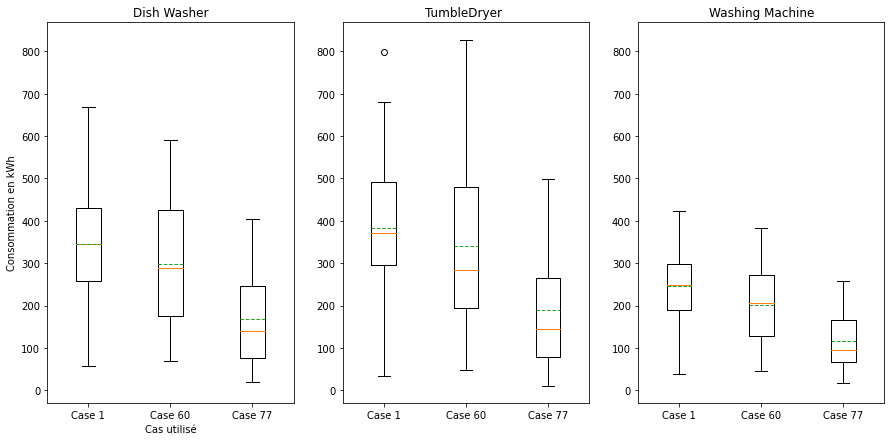

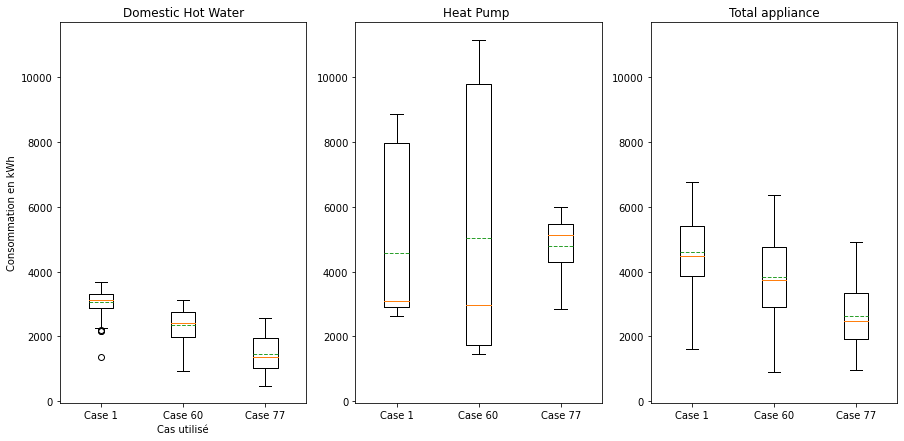

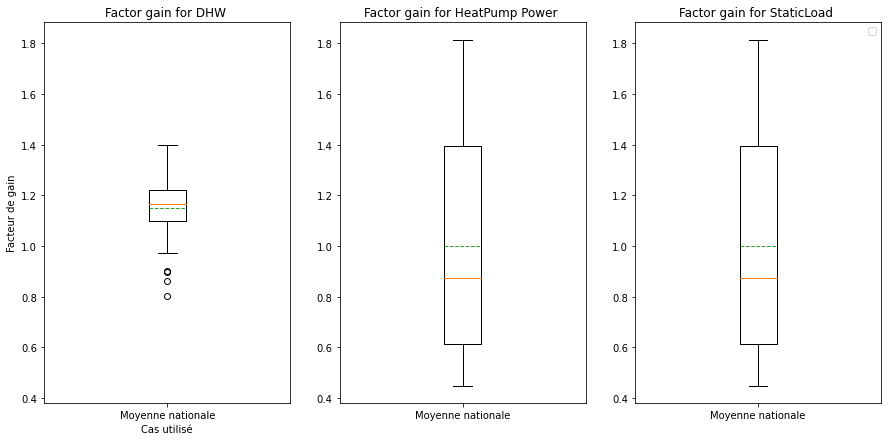

In [64]:
plt.figure(1)

ax1 = plt.subplot(131)
ax1.title.set_text('Dish Washer')
ax1.set_xlabel ('Cas utilisé')
ax1.set_ylabel ('Consommation en kWh')
ax1.xaxis.set_ticklabels(['Case 1','Case 60', 'Case 77'])
bp = plt.boxplot(DishWasher, meanline = True,showmeans =True)

ax2 = plt.subplot(132, sharey = ax1)
ax2.title.set_text('TumbleDryer ')
ax2.xaxis.set_ticklabels(['Case 1','Case 60', 'Case 77'])
bp = plt.boxplot(TumbleDryer, meanline = True,showmeans =True)

ax3 = plt.subplot(133, sharey=ax1)
ax3.title.set_text('Washing Machine')
ax3.xaxis.set_ticklabels(['Case 1','Case 60', 'Case 77'])
bp = plt.boxplot(WashingMachine, meanline = True,showmeans =True)

plt.figure(2)
ax4 = plt.subplot(131)
ax4.title.set_text('Domestic Hot Water')
ax4.set_xlabel ('Cas utilisé')
ax4.set_ylabel ('Consommation en kWh')
ax4.xaxis.set_ticklabels(['Case 1','Case 60', 'Case 77'])
bp = plt.boxplot(DHW, meanline = True,showmeans =True)

ax5 = plt.subplot(132, sharey=ax4)
ax5.title.set_text('Heat Pump ')
ax5.xaxis.set_ticklabels(['Case 1','Case 60', 'Case 77'])
bp = plt.boxplot(HP, meanline = True,showmeans =True)

ax6 = plt.subplot(133, sharey=ax4)
ax6.title.set_text('Total appliance')
ax6.xaxis.set_ticklabels(['Case 1','Case 60', 'Case 77'])
bp = plt.boxplot(TotalConsumption, meanline = True,showmeans =True)

if corr == True :
    plt.figure(3)
    ax7 = plt.subplot(131)
    ax7.title.set_text('Factor gain for DHW ')
    ax7.set_xlabel ('Cas utilisé')
    ax7.set_ylabel ('Facteur de gain')
    ax7.xaxis.set_ticklabels(['Moyenne nationale'])
    bp = plt.boxplot(DHW_fact, meanline = True,showmeans =True)

    ax8 = plt.subplot(132, sharey = ax7)
    ax8.title.set_text('Factor gain for HeatPump Power ')
    ax8.xaxis.set_ticklabels(['Moyenne nationale'])
    bp = plt.boxplot(HP_fact, meanline = True,showmeans =True)

    ax9 = plt.subplot(133, sharey = ax7)
    ax9.title.set_text('Factor gain for StaticLoad ')
    ax9.xaxis.set_ticklabels(['Moyenne nationale'])
    bp = plt.boxplot(HP_fact, meanline = True,showmeans =True)

plt.legend()
plt.show()